In [1]:
import pickle
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

In [2]:
df_results = pd.read_csv('reference-and-data/lookup_table.csv')
best_params = {'template_name': '8-1', 'alkyne_name': '22-5'}

print(df_results.shape)
df_results.head()

(270, 10)


,template_name,alkyne_name,template_smi,alkyne_smi,molecule_smi,synthesis_success,synthesis_success_prob,is_experiment_x,abl1_pIC50,abl1_pIC50_std
0,8-1,22-1,Cc1ccc(C(=O)Nc2ccc(CN3CCN(C)CC3)c(C(F)(F)F)c2)...,C#Cc1cnc2ccc(C(=N)OC)cn12,COC(=N)c1ccc2ncc(C#Cc3cc(C(=O)Nc4ccc(CN5CCN(C)...,1,0.536046,0,7.390089,7.156328
1,8-1,22-2,Cc1ccc(C(=O)Nc2ccc(CN3CCN(C)CC3)c(C(F)(F)F)c2)...,C#Cc1cnc2ccccn12,Cc1ccc(C(=O)Nc2ccc(CN3CCN(C)CC3)c(C(F)(F)F)c2)...,1,1.000000,1,8.045757,1.000000
2,8-1,22-3,Cc1ccc(C(=O)Nc2ccc(CN3CCN(C)CC3)c(C(F)(F)F)c2)...,C#Cc1cnc2ccc(C(F)(F)F)cn12,Cc1ccc(C(=O)Nc2ccc(CN3CCN(C)CC3)c(C(F)(F)F)c2)...,0,0.000000,1,7.515735,7.152991
3,8-1,22-4,Cc1ccc(C(=O)Nc2ccc(CN3CCN(C)CC3)c(C(F)(F)F)c2)...,C#Cc1cnc2cccnn12,Cc1ccc(C(=O)Nc2ccc(CN3CCN(C)CC3)c(C(F)(F)F)c2)...,1,1.000000,1,8.065502,1.000000
4,8-1,22-5,Cc1ccc(C(=O)Nc2ccc(CN3CCN(C)CC3)c(C(F)(F)F)c2)...,C#Cc1cncc2nccn12,Cc1ccc(C(=O)Nc2ccc(CN3CCN(C)CC3)c(C(F)(F)F)c2)...,1,1.000000,1,9.698970,1.000000


In [3]:
111/1276

0.08699059561128526

In [4]:
def plot_constr_surface_cat(df, pkl_file=None, n=0, ax=None, mark_best=True):
    
    if ax is None:
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
        
        
    domain_template = df['template_name'].unique().tolist()
    domain_alkyne = df['alkyne_name'].unique().tolist()
    
    print(domain_template)
    print(domain_alkyne)
    
    Z = np.zeros((len(domain_alkyne), len(domain_template)))
    Z_feas = np.empty((len(domain_alkyne), len(domain_template)))
    X = []
    X_str = []
    z_flat = []
    for x_index, x in enumerate(domain_template):
        for y_index, y in enumerate(domain_alkyne):
            
            row = df[(df['template_name']==x)&(df['alkyne_name']==y)].to_dict('r')[0]
            #print(row)
            z = row['abl1_pIC50']
            feas_val = row['synthesis_success'] # 1=success, 0=failure
            if feas_val==1:
                feas_bool=True
            else:
                feas_bool=False
            X.append([y_index, x_index])
            X_str.append([y, x])
            z_flat.append(z)
            Z[y_index, x_index] = z
            Z_feas[y_index, x_index] = feas_bool
            
    
    #Z = np.log(Z)

    im = ax.imshow(Z.T, origin='lower', cmap = 'RdYlGn')#plt.get_cmap('golem'))
    ax.imshow(Z_feas.T, origin='lower', cmap='gray', alpha=0.55, interpolation='none')
    
    x_tick_labels = [l.get_text() for l in ax.get_xticklabels()]
    y_tick_labels = [l.get_text() for l in ax.get_yticklabels()]
    
    
    x_tick_labels = domain_alkyne
    y_tick_labels = domain_template
    
    ax.set_xticks(np.arange(len(domain_alkyne)))
    ax.set_yticks(np.arange(len(domain_template)))
    ax.set_xticklabels(x_tick_labels, rotation=90)
    ax.set_yticklabels(y_tick_labels)
    
    ax.set_ylabel('template name', fontsize=12)
    ax.set_xlabel('alkyne name', fontsize=12)
    
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax)
    
    if mark_best is True:
        best_ix = np.argmax(z_flat)
        X_best = X[best_ix]
        _ = ax.scatter(X_best[0], X_best[1], marker='*', s=200, color='#ffc6ff', linewidth=2, zorder=20)
        
    if pkl_file is not None:
        with open(pkl_file, 'rb') as content:
            data = pickle.load(content)
            
        X_str_ = data[n].loc[:, ['template', 'alkyne']][:20]#[:-1] # remove last data point
        X_  = pd.DataFrame([[domain_template.index(x[0]), domain_alkyne.index(x[1])] for x in X_str_.to_numpy() ], 
            columns=X_str_.columns
                          )
        
        ax.scatter(X_['alkyne'], X_['template'], marker='X', s=100, color='#adb5bd', edgecolor='k', zorder=10)
        

['8-1', '8-2', '8-3', '8-4', '8-5', '16-1', '16-2', '16-3', '16-4', '19']
['22-1', '22-2', '22-3', '22-4', '22-5', '22-6', '22-7', '22-8', '22-9', '22-10', '22-11', '22-12', '22-13', '22-14', '22-15', '22-16', '22-17', '22-18', '22-19', '22-20', '22-21', '22-22', '22-23', '22-24', '22-25', '22-26', '22-27']


/home/riley/Software/anaconda3/envs/atlas/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.


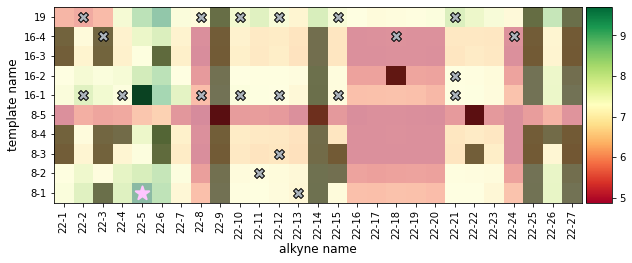

In [12]:
plot_constr_surface_cat(df_results, pkl_file='desc_botorch-fwa-0/results.pkl', n=6)

plt.savefig('abl_kinase_space_example.png', dpi=400)

In [122]:
df_results.sort_values(by='abl1_pIC50').tail()

,template_name,alkyne_name,template_smi,alkyne_smi,molecule_smi,synthesis_success,synthesis_success_prob,is_experiment_x,abl1_pIC50,abl1_pIC50_std
247,19,22-5,CN1CCN(Cc2ccc(NC(=O)Nc3cc(Br)n(C)n3)cc2C(F)(F)...,C#Cc1cncc2nccn12,CN1CCN(Cc2ccc(NC(=O)Nc3cc(C#Cc4cncc5nccn45)n(C...,1,1.0,1,8.69897,1.000000
140,16-1,22-6,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)c(C(F)(F)F)c2)...,C#Cc1cnc2cnccn12,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)c(C(F)(F)F)c2)...,1,1.0,1,9.00000,1.000000
139,16-1,22-5,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)c(C(F)(F)F)c2)...,C#Cc1cncc2nccn12,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)c(C(F)(F)F)c2)...,0,0.0,1,9.25938,7.339233
248,19,22-6,CN1CCN(Cc2ccc(NC(=O)Nc3cc(Br)n(C)n3)cc2C(F)(F)...,C#Cc1cnc2cnccn12,CN1CCN(Cc2ccc(NC(=O)Nc3cc(C#Cc4cnc5cnccn45)n(C...,1,1.0,1,9.39794,1.000000
4,8-1,22-5,Cc1ccc(C(=O)Nc2ccc(CN3CCN(C)CC3)c(C(F)(F)F)c2)...,C#Cc1cncc2nccn12,Cc1ccc(C(=O)Nc2ccc(CN3CCN(C)CC3)c(C(F)(F)F)c2)...,1,1.0,1,9.69897,1.000000


/home/riley/Software/anaconda3/envs/feas/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='abl1_pIC50', ylabel='Density'>

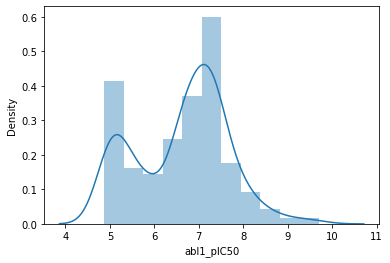

In [123]:
sns.distplot(df_results['abl1_pIC50'])